In [14]:
!pip install matplotlib seaborn pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Assignment-5-jupyter/cleaned_ebay_deals.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.sort_values('timestamp')

df.head()

,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-10-31 18:17:12,Apple iPhone 15 Pro Max A2849 1TB Natural Unlo...,699.99,699.99,Seller pays for return shipping,https://www.ebay.com/itm/357492955429?_trkparm...,0.00
67,2025-10-31 18:17:12,JBL PartyBox Stage 320 Illuminated LED Wireles...,375.99,599.99,Seller pays for return shipping,https://www.ebay.com/itm/157359929835?_trkparm...,37.33
66,2025-10-31 18:17:12,"Bose Ultra Open Earbuds, Certified Refurbished",149.00,299.00,Shipping info unavailable,https://www.ebay.com/itm/186628375702?_trkparm...,50.17
65,2025-10-31 18:17:12,Seagate BarraCuda 8TB ST8000DM004 (Recertified),125.00,125.00,Shipping info unavailable,https://www.ebay.com/itm/236170725942?_trkparm...,0.00
64,2025-10-31 18:17:12,Recertified 2TB WD Elements Portable Hard Driv...,45.99,79.99,Save on combined shipping,https://www.ebay.com/itm/296244823016?_trkparm...,42.51


C:\Users\ghadi\AppData\Local\Temp\ipykernel_19832\1561671794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette='Blues_d')


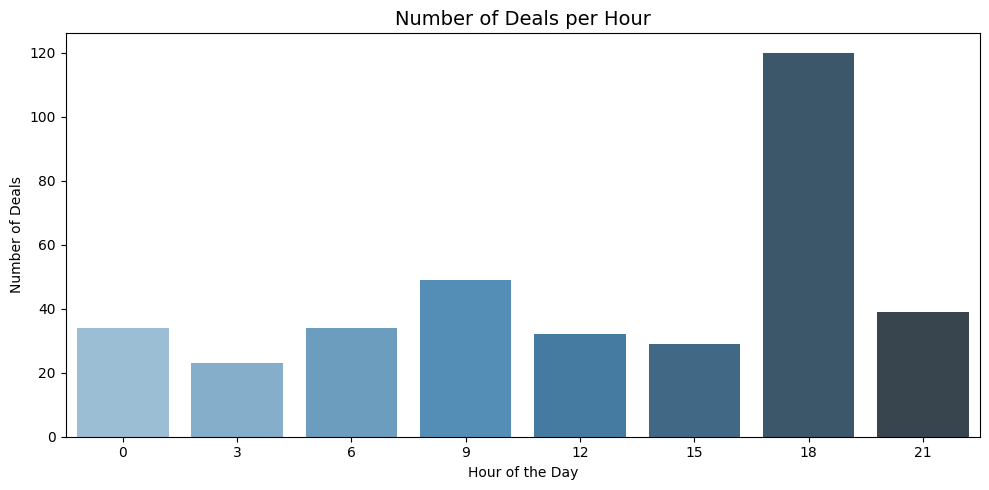

In [15]:
df['hour'] = df['timestamp'].dt.hour
deals_per_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette='Blues_d')
plt.title('Number of Deals per Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deals')
plt.tight_layout()
plt.show()

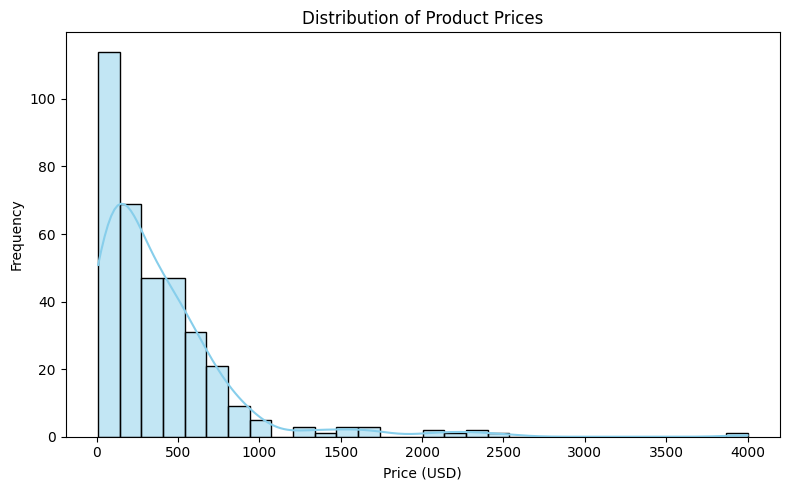

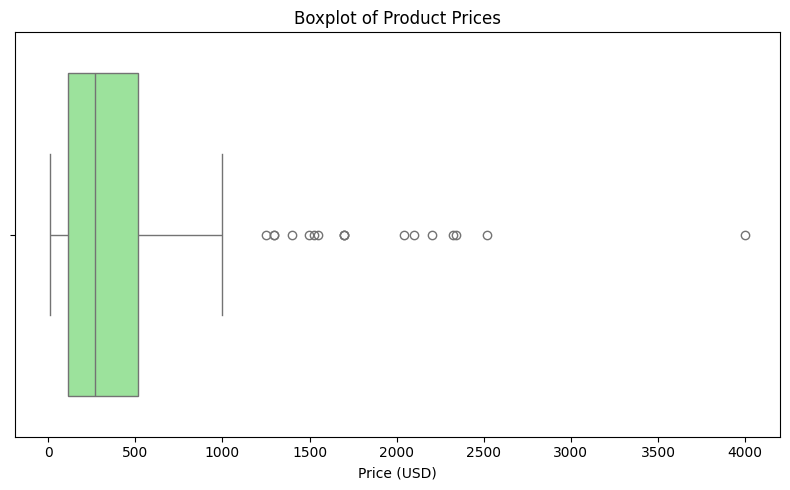

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()

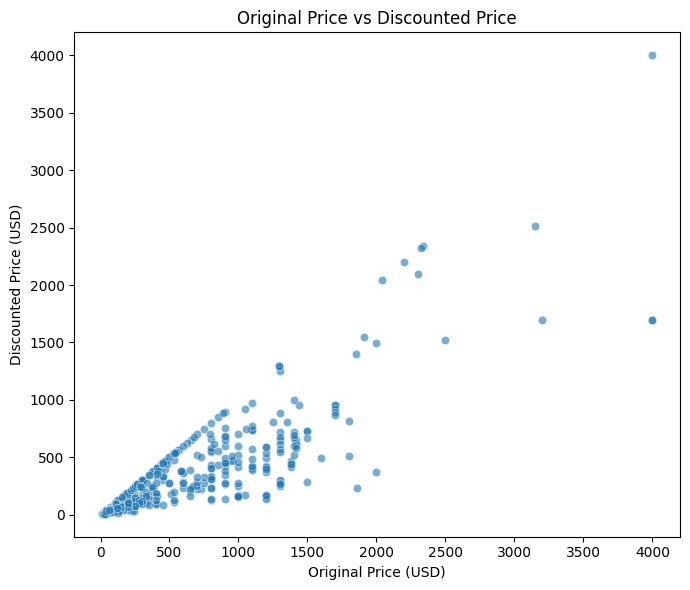

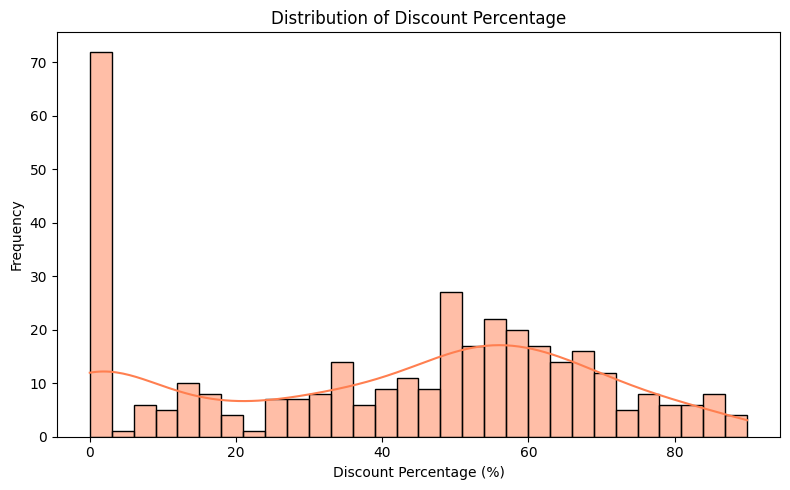

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='original_price', y='price', alpha=0.6)
plt.title('Original Price vs Discounted Price')
plt.xlabel('Original Price (USD)')
plt.ylabel('Discounted Price (USD)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='coral')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\ghadi\AppData\Local\Temp\ipykernel_19832\2071088724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette='coolwarm')


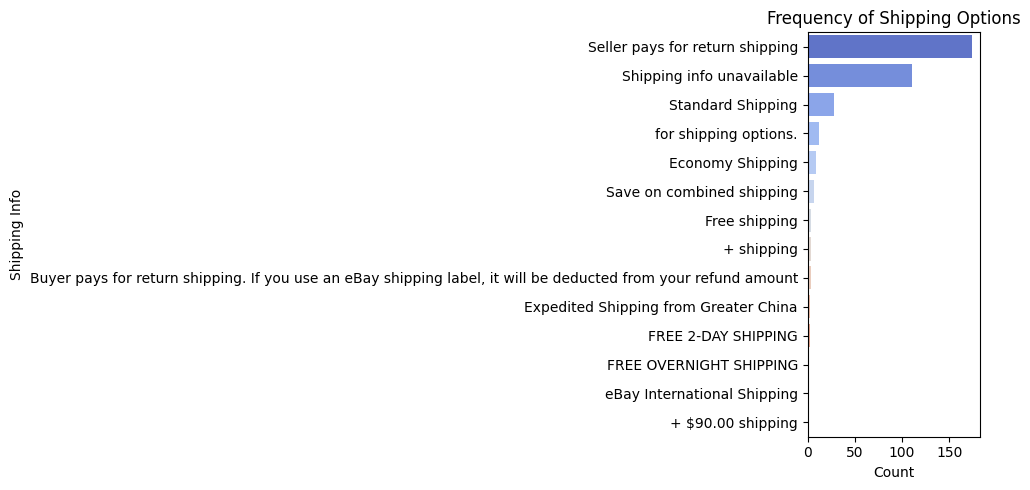

In [18]:
shipping_counts = df['shipping'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette='coolwarm')
plt.title('Frequency of Shipping Options')
plt.xlabel('Count')
plt.ylabel('Shipping Info')
plt.tight_layout()
plt.show()

C:\Users\ghadi\AppData\Local\Temp\ipykernel_19832\2460332368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette='mako')


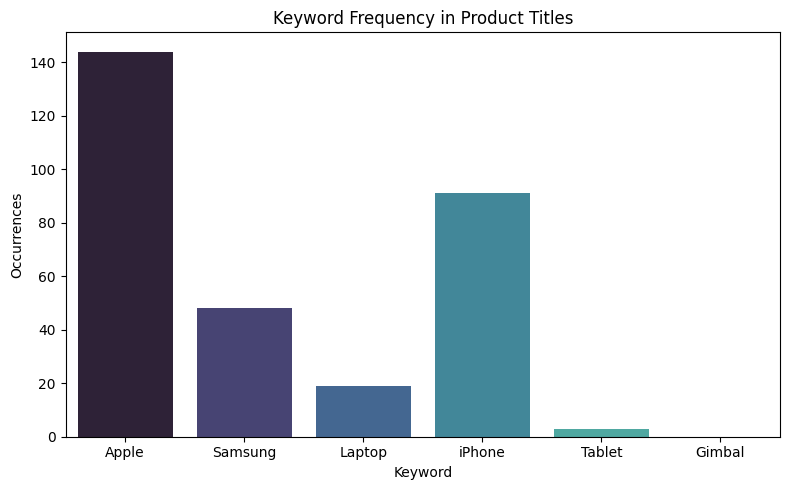

In [19]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = df['title'].str.contains(keyword, case=False, na=False).sum()

plt.figure(figsize=(8,5))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette='mako')
plt.title('Keyword Frequency in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Occurrences')
plt.tight_layout()
plt.show()

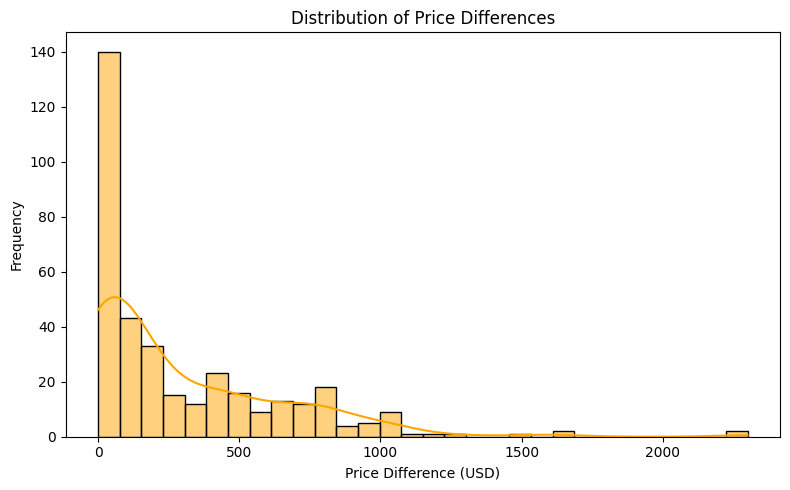

In [20]:
df['price_difference'] = df['original_price'] - df['price']

plt.figure(figsize=(8,5))
sns.histplot(df['price_difference'], bins=30, kde=True, color='orange')
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
top_5_deals = df.sort_values('discount_percentage', ascending=False).head(5)

print("Top 5 Deals with Highest Discounts:")
display(top_5_deals[['title', 'price', 'original_price', 'discount_percentage', 'shipping', 'item_url']])

Top 5 Deals with Highest Discounts:


,title,price,original_price,discount_percentage,shipping,item_url
344,Apple AirPods 2nd Gen Replacement Charging Cas...,12.99,129.00,89.93,Shipping info unavailable,https://www.ebay.com/itm/156191419868?_trkparm...
334,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,135.99,1199.99,88.67,Seller pays for return shipping,https://www.ebay.com/itm/185698601733?_trkparm...
41,"Dell Latitude 7410 14"" 16GB 512GB SSD Core� i5...",229.99,1859.00,87.63,Shipping info unavailable,https://www.ebay.com/itm/365829939363?_trkparm...
97,Samsung Galaxy S22 S901 128GB Unlocked - Very ...,154.95,1199.99,87.09,for shipping options.,https://www.ebay.com/itm/404513869457?_trkparm...
232,Samsung Galaxy S22 S901 128GB Unlocked - Excel...,163.95,1199.99,86.34,Seller pays for return shipping,https://www.ebay.com/itm/364498823740?_trkparm...
